In [43]:
import numpy as np
!pip install pdfminer.six

In [44]:
from pdfminer.high_level import extract_pages
for page_layout in extract_pages("en/solution/solution_12345.pdf"):
    for element in page_layout:
        print(element)

<LTTextBoxHorizontal(0) 268.162,788.783,327.113,798.746 'Correction\n'>
<LTTextBoxHorizontal(1) 172.569,707.410,197.470,719.365 'Test\n'>
<LTTextBoxHorizontal(2) 280.089,722.919,354.559,732.882 'Nom et pr´enom :\n'>
<LTTextBoxHorizontal(3) 281.990,696.791,490.790,706.754 '. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .\n'>
<LTTextBoxHorizontal(4) 85.039,660.457,492.939,682.655 'Illustration of amc2moodle capabilities. All these questions can be converted automatically to\nmoodle with the same layout.\n'>
<LTTextBoxHorizontal(5) 119.754,636.767,475.528,651.113 'Multiple choice tests using AMC Latex Format\n'>
<LTTextBoxHorizontal(6) 85.039,605.001,149.851,626.919 'Question 1\nWhat is 8 + 2?\n'>
<LTTextBoxHorizontal(7) 102.583,581.909,107.564,591.872 '0\n'>
<LTTextBoxHorizontal(8) 102.583,565.664,107.564,575.627 '0\n'>
<LTTextBoxHorizontal(9) 124.262,581.909,129.243,591.872 '1\n'>
<LTTextBoxHorizontal(10) 124.262,565.664,129.243,575.627 '1\

In [45]:
!pip install PyPDF2
!pip install pudb #al final utilizo el debugger de DataSpell

In [46]:
from PyPDF2 import PdfReader
import pandas as pd

reader = PdfReader("en/solution/solution_12345.pdf")
page = reader.pages[0]
a = [[],[],[]]

def visitor_body(text, cm, tm, fontDict, fontSize):
    a.append([text, tm[4], tm[5]])

page.extract_text(visitor_text=visitor_body)
pd.DataFrame(a).to_csv('export.csv')

In [47]:
from PyPDF2 import PdfReader

reader = PdfReader("en/solution/solution_12345.pdf")

for page in reader.pages:
    if "/Annots" in page:
        for annot in page["/Annots"]:
            obj = annot.get_object()
            annotation = {"subtype": obj["/Subtype"], "location": obj["/Rect"]}
            print(annotation)

{'subtype': '/Widget', 'location': [89.867, 581.13, 102.583, 593.846]}
{'subtype': '/Widget', 'location': [111.549, 581.13, 124.265, 593.846]}
{'subtype': '/Widget', 'location': [133.232, 581.13, 145.948, 593.846]}
{'subtype': '/Widget', 'location': [154.914, 581.13, 167.631, 593.846]}
{'subtype': '/Widget', 'location': [176.597, 581.13, 189.313, 593.846]}
{'subtype': '/Widget', 'location': [198.28, 581.13, 210.996, 593.846]}
{'subtype': '/Widget', 'location': [219.962, 581.13, 232.678, 593.846]}
{'subtype': '/Widget', 'location': [241.645, 581.13, 254.361, 593.846]}
{'subtype': '/Widget', 'location': [263.327, 581.13, 276.044, 593.846]}
{'subtype': '/Widget', 'location': [285.01, 581.13, 297.726, 593.846]}
{'subtype': '/Widget', 'location': [89.867, 564.885, 102.583, 577.602]}
{'subtype': '/Widget', 'location': [111.549, 564.885, 124.265, 577.602]}
{'subtype': '/Widget', 'location': [133.232, 564.885, 145.948, 577.602]}
{'subtype': '/Widget', 'location': [154.914, 564.885, 167.631, 57

In [48]:
!pip install svgwrite

In [49]:
from PyPDF2 import PdfReader
import svgwrite

reader = PdfReader("en/solution/solution_12345.pdf")
page = reader.pages[0]

dwg = svgwrite.Drawing("Extract_text_rect.svg", profile="tiny")


def visitor_svg_rect(op, args, cm, tm):
    if op == b"re":
        (x, y, w, h) = (args[i].as_numeric() for i in range(4))
        dwg.add(dwg.rect((x, y), (w, h), stroke="red", fill_opacity=0.05))


def visitor_svg_text(text, cm, tm, fontDict, fontSize):
    (x, y) = (tm[4], tm[5])
    dwg.add(dwg.text(text, insert=(x, y), fill="blue"))


page.extract_text(
    visitor_operand_before=visitor_svg_rect, visitor_text=visitor_svg_text
)
dwg.save()

In [50]:
!pip install boxdetect

boxdetect te pide png de entrada, convertido el pdf a png en terminal con:
pdftoppm -png solution_12345.pdf out-im

In [51]:
from boxdetect import config

#tiene que ser un png
file_name = 'en/solution/sol_pdftoppm-1.png'

cfg = config.PipelinesConfig()

#Esto sirve para identificar grupos de casillas, que no considera checkboxes si no character boxes
cfg.horizontal_max_distance = [10]

# important to adjust these values to match the size of boxes on your image
cfg.width_range = (15,30)
cfg.height_range = (15,30)

# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [1.0]

# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.8, 1.2)

# group_size_range starting from 2 will skip all the groups
# with a single box detected inside (like checkboxes)
cfg.group_size_range = (1, 1)

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

In [52]:
from boxdetect.pipelines import get_boxes

rects, grouping_rects, image, output_image = get_boxes(
    file_name, cfg=cfg, plot=False)

print(grouping_rects)

Processing file:  en/solution/sol_pdftoppm-1.png
[(188, 518, 27, 27), (232, 518, 27, 27), (278, 518, 27, 27), (324, 518, 27, 27), (368, 518, 27, 27), (414, 518, 27, 27), (458, 518, 27, 27), (504, 518, 27, 27), (550, 518, 27, 27), (594, 518, 27, 27), (188, 552, 27, 27), (232, 552, 27, 27), (278, 552, 27, 27), (324, 552, 27, 27), (368, 552, 27, 27), (414, 552, 27, 27), (458, 552, 27, 27), (504, 552, 27, 27), (550, 552, 27, 27), (594, 552, 27, 27), (194, 690, 27, 27), (194, 724, 27, 27), (194, 756, 27, 27), (194, 789, 29, 29)]


Processing file:  en/solution/sol_pdftoppm-1.png


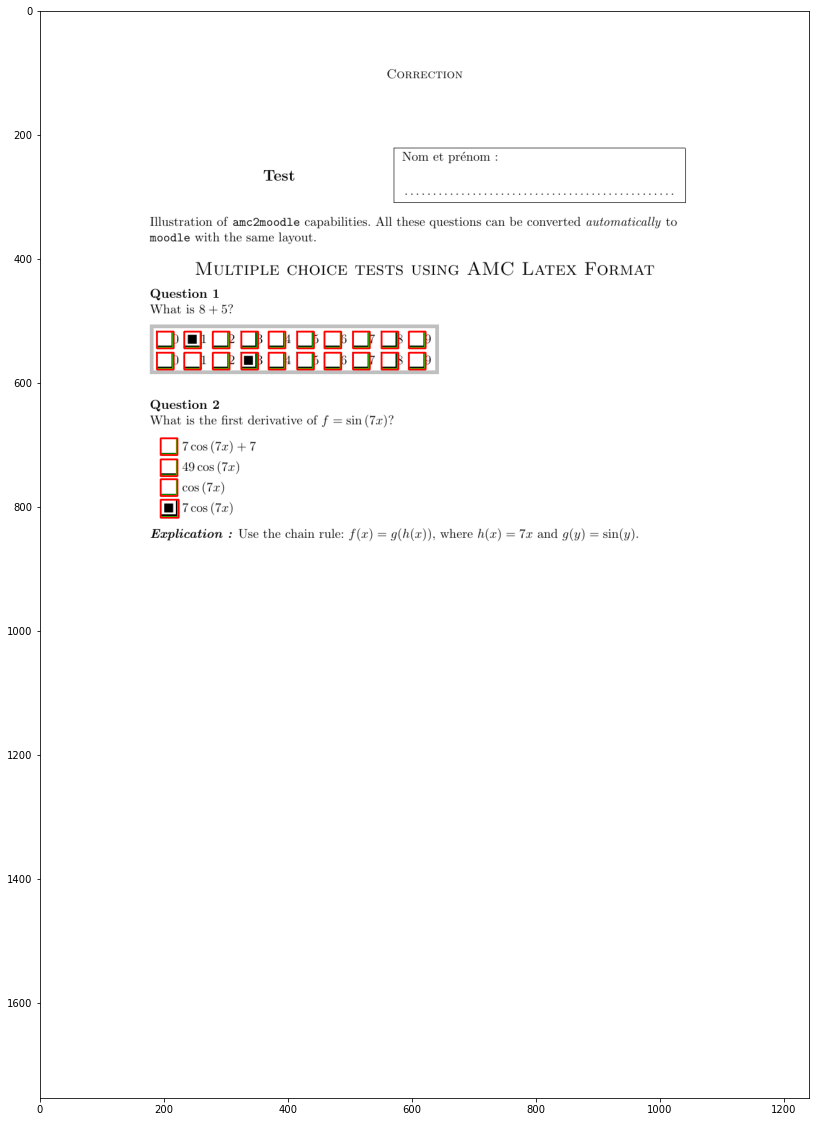

In [53]:
from boxdetect.img_proc import draw_rects, get_image
import matplotlib.pyplot as plt
%matplotlib inline

out_img = draw_rects(get_image(file_name), rects, thickness=3)

plt.figure(figsize=(20,20))
plt.imshow(output_image)
plt.show()

no reconoce las casillas del ejercicio 1 como casillas ya que estan demasiado cerca, ¿configuracion?

In [54]:
rects

array([[194, 789,  28,  28],
       [194, 756,  26,  26],
       [194, 724,  26,  26],
       [194, 690,  26,  26],
       [594, 552,  26,  26],
       [550, 552,  26,  26],
       [504, 552,  26,  26],
       [458, 552,  26,  26],
       [414, 552,  26,  26],
       [368, 552,  26,  26],
       [324, 552,  26,  26],
       [278, 552,  26,  26],
       [232, 552,  26,  26],
       [188, 552,  26,  26],
       [594, 518,  26,  26],
       [550, 518,  26,  26],
       [504, 518,  26,  26],
       [458, 518,  26,  26],
       [414, 518,  26,  26],
       [368, 518,  26,  26],
       [324, 518,  26,  26],
       [278, 518,  26,  26],
       [232, 518,  26,  26],
       [188, 518,  26,  26]], dtype=int32)

In [55]:
grouping_rects

[(188, 518, 27, 27),
 (232, 518, 27, 27),
 (278, 518, 27, 27),
 (324, 518, 27, 27),
 (368, 518, 27, 27),
 (414, 518, 27, 27),
 (458, 518, 27, 27),
 (504, 518, 27, 27),
 (550, 518, 27, 27),
 (594, 518, 27, 27),
 (188, 552, 27, 27),
 (232, 552, 27, 27),
 (278, 552, 27, 27),
 (324, 552, 27, 27),
 (368, 552, 27, 27),
 (414, 552, 27, 27),
 (458, 552, 27, 27),
 (504, 552, 27, 27),
 (550, 552, 27, 27),
 (594, 552, 27, 27),
 (194, 690, 27, 27),
 (194, 724, 27, 27),
 (194, 756, 27, 27),
 (194, 789, 29, 29)]

In [56]:
from boxdetect.pipelines import get_checkboxes

checkboxes = get_checkboxes(
    file_name, cfg=cfg, px_threshold=0.1, plot=False, verbose=True)
checkboxes

Processing file:  en/solution/sol_pdftoppm-1.png
----------------------------------
nonzero_px_count:  0
all_px_count:  361
nonzero_px_count / all_px_count =  0.0
----------------------------------
----------------------------------
nonzero_px_count:  225
all_px_count:  361
nonzero_px_count / all_px_count =  0.6232686980609419
----------------------------------
----------------------------------
nonzero_px_count:  0
all_px_count:  361
nonzero_px_count / all_px_count =  0.0
----------------------------------
----------------------------------
nonzero_px_count:  0
all_px_count:  361
nonzero_px_count / all_px_count =  0.0
----------------------------------
----------------------------------
nonzero_px_count:  0
all_px_count:  361
nonzero_px_count / all_px_count =  0.0
----------------------------------
----------------------------------
nonzero_px_count:  0
all_px_count:  361
nonzero_px_count / all_px_count =  0.0
----------------------------------
----------------------------------
nonze

/home/andres/anaconda3/lib/python3.9/site-packages/boxdetect/pipelines.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([


array([[(188, 518, 27, 27), False,
        array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   

Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (188, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


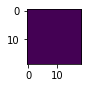

Checkbox bounding rectangle (x,y,width,height):  (232, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


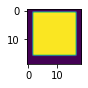

Checkbox bounding rectangle (x,y,width,height):  (278, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


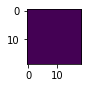

Checkbox bounding rectangle (x,y,width,height):  (324, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


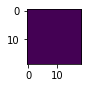

Checkbox bounding rectangle (x,y,width,height):  (368, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


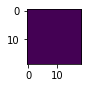

Checkbox bounding rectangle (x,y,width,height):  (414, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


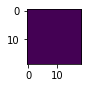

Checkbox bounding rectangle (x,y,width,height):  (458, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


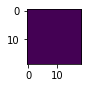

Checkbox bounding rectangle (x,y,width,height):  (504, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


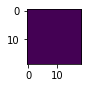

Checkbox bounding rectangle (x,y,width,height):  (550, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


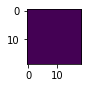

Checkbox bounding rectangle (x,y,width,height):  (594, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


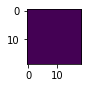

Checkbox bounding rectangle (x,y,width,height):  (188, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


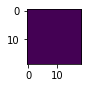

Checkbox bounding rectangle (x,y,width,height):  (232, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


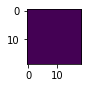

Checkbox bounding rectangle (x,y,width,height):  (278, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


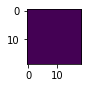

Checkbox bounding rectangle (x,y,width,height):  (324, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


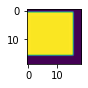

Checkbox bounding rectangle (x,y,width,height):  (368, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


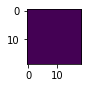

Checkbox bounding rectangle (x,y,width,height):  (414, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


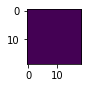

Checkbox bounding rectangle (x,y,width,height):  (458, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


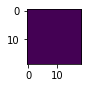

Checkbox bounding rectangle (x,y,width,height):  (504, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


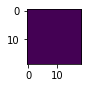

Checkbox bounding rectangle (x,y,width,height):  (550, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


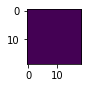

Checkbox bounding rectangle (x,y,width,height):  (594, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


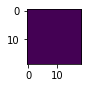

Checkbox bounding rectangle (x,y,width,height):  (194, 690, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


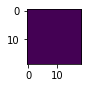

Checkbox bounding rectangle (x,y,width,height):  (194, 724, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


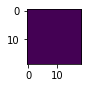

Checkbox bounding rectangle (x,y,width,height):  (194, 756, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


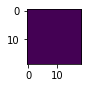

Checkbox bounding rectangle (x,y,width,height):  (194, 789, 29, 29)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


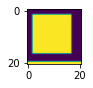

In [57]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()

In [58]:
import PyPDF2 as pypdf

pdfobject=open('en/solution/solution_12345.pdf','rb')
pdf = pypdf.PdfFileReader(pdfobject).__dict__

In [59]:
import PyPDF2 as pypdf

pdfobject=open('en/solution/solution_12345.pdf','rb')
pdf = pypdf.PdfFileReader(pdfobject)
var = pdf.getFields()
print(var)

{'1:case:basic-adittion:1,1': {'/T': '1:case:basic-adittion:1,1', '/FT': '/Btn', '/V': '/Off', '/Rect': [89.867, 581.13, 102.583, 593.846]}, '1:case:basic-adittion:1,2': {'/T': '1:case:basic-adittion:1,2', '/FT': '/Btn', '/V': '/Yes', '/Rect': [111.549, 581.13, 124.265, 593.846]}, '1:case:basic-adittion:1,3': {'/T': '1:case:basic-adittion:1,3', '/FT': '/Btn', '/V': '/Off', '/Rect': [133.232, 581.13, 145.948, 593.846]}, '1:case:basic-adittion:1,4': {'/T': '1:case:basic-adittion:1,4', '/FT': '/Btn', '/V': '/Off', '/Rect': [154.914, 581.13, 167.631, 593.846]}, '1:case:basic-adittion:1,5': {'/T': '1:case:basic-adittion:1,5', '/FT': '/Btn', '/V': '/Off', '/Rect': [176.597, 581.13, 189.313, 593.846]}, '1:case:basic-adittion:1,6': {'/T': '1:case:basic-adittion:1,6', '/FT': '/Btn', '/V': '/Off', '/Rect': [198.28, 581.13, 210.996, 593.846]}, '1:case:basic-adittion:1,7': {'/T': '1:case:basic-adittion:1,7', '/FT': '/Btn', '/V': '/Off', '/Rect': [219.962, 581.13, 232.678, 593.846]}, '1:case:basic-

In [60]:
temp = []
for key, value in var.items():
    temp.append(value)
temp

[{'/T': '1:case:basic-adittion:1,1',
  '/FT': '/Btn',
  '/V': '/Off',
  '/Rect': [89.867, 581.13, 102.583, 593.846]},
 {'/T': '1:case:basic-adittion:1,2',
  '/FT': '/Btn',
  '/V': '/Yes',
  '/Rect': [111.549, 581.13, 124.265, 593.846]},
 {'/T': '1:case:basic-adittion:1,3',
  '/FT': '/Btn',
  '/V': '/Off',
  '/Rect': [133.232, 581.13, 145.948, 593.846]},
 {'/T': '1:case:basic-adittion:1,4',
  '/FT': '/Btn',
  '/V': '/Off',
  '/Rect': [154.914, 581.13, 167.631, 593.846]},
 {'/T': '1:case:basic-adittion:1,5',
  '/FT': '/Btn',
  '/V': '/Off',
  '/Rect': [176.597, 581.13, 189.313, 593.846]},
 {'/T': '1:case:basic-adittion:1,6',
  '/FT': '/Btn',
  '/V': '/Off',
  '/Rect': [198.28, 581.13, 210.996, 593.846]},
 {'/T': '1:case:basic-adittion:1,7',
  '/FT': '/Btn',
  '/V': '/Off',
  '/Rect': [219.962, 581.13, 232.678, 593.846]},
 {'/T': '1:case:basic-adittion:1,8',
  '/FT': '/Btn',
  '/V': '/Off',
  '/Rect': [241.645, 581.13, 254.361, 593.846]},
 {'/T': '1:case:basic-adittion:1,9',
  '/FT': '/Bt

In [61]:
temp[3]['/V']

'/Off'

In [80]:
cord_scan = checkboxes.transpose()[0]
cord_scan

array([(188, 518, 27, 27), (232, 518, 27, 27), (278, 518, 27, 27),
       (324, 518, 27, 27), (368, 518, 27, 27), (414, 518, 27, 27),
       (458, 518, 27, 27), (504, 518, 27, 27), (550, 518, 27, 27),
       (594, 518, 27, 27), (188, 552, 27, 27), (232, 552, 27, 27),
       (278, 552, 27, 27), (324, 552, 27, 27), (368, 552, 27, 27),
       (414, 552, 27, 27), (458, 552, 27, 27), (504, 552, 27, 27),
       (550, 552, 27, 27), (594, 552, 27, 27), (194, 690, 27, 27),
       (194, 724, 27, 27), (194, 756, 27, 27), (194, 789, 29, 29)],
      dtype=object)

In [79]:
lcord_sol = []
for i in temp:
    lcord_sol.append(i['/Rect'])
lcord_sol

[[89.867, 581.13, 102.583, 593.846],
 [111.549, 581.13, 124.265, 593.846],
 [133.232, 581.13, 145.948, 593.846],
 [154.914, 581.13, 167.631, 593.846],
 [176.597, 581.13, 189.313, 593.846],
 [198.28, 581.13, 210.996, 593.846],
 [219.962, 581.13, 232.678, 593.846],
 [241.645, 581.13, 254.361, 593.846],
 [263.327, 581.13, 276.044, 593.846],
 [285.01, 581.13, 297.726, 593.846],
 [89.867, 564.885, 102.583, 577.602],
 [111.549, 564.885, 124.265, 577.602],
 [133.232, 564.885, 145.948, 577.602],
 [154.914, 564.885, 167.631, 577.602],
 [176.597, 564.885, 189.313, 577.602],
 [198.28, 564.885, 210.996, 577.602],
 [219.962, 564.885, 232.678, 577.602],
 [241.645, 564.885, 254.361, 577.602],
 [263.327, 564.885, 276.044, 577.602],
 [285.01, 564.885, 297.726, 577.602],
 [93.245, 498.248, 105.961, 510.965],
 [93.245, 482.308, 105.961, 495.024],
 [93.245, 466.368, 105.961, 479.084],
 [93.245, 450.428, 105.961, 463.144]]

In [83]:
import numpy as np

cord_sol = np.array(lcord_sol)
cord_sol

array([[89.867, 581.13, 102.583, 593.846],
       [111.549, 581.13, 124.265, 593.846],
       [133.232, 581.13, 145.948, 593.846],
       [154.914, 581.13, 167.631, 593.846],
       [176.597, 581.13, 189.313, 593.846],
       [198.28, 581.13, 210.996, 593.846],
       [219.962, 581.13, 232.678, 593.846],
       [241.645, 581.13, 254.361, 593.846],
       [263.327, 581.13, 276.044, 593.846],
       [285.01, 581.13, 297.726, 593.846],
       [89.867, 564.885, 102.583, 577.602],
       [111.549, 564.885, 124.265, 577.602],
       [133.232, 564.885, 145.948, 577.602],
       [154.914, 564.885, 167.631, 577.602],
       [176.597, 564.885, 189.313, 577.602],
       [198.28, 564.885, 210.996, 577.602],
       [219.962, 564.885, 232.678, 577.602],
       [241.645, 564.885, 254.361, 577.602],
       [263.327, 564.885, 276.044, 577.602],
       [285.01, 564.885, 297.726, 577.602],
       [93.245, 498.248, 105.961, 510.965],
       [93.245, 482.308, 105.961, 495.024],
       [93.245, 466.368, 105

In [87]:
np.asarray(cord_scan[0])

array([188, 518,  27,  27])

In [128]:
arr = [0]*4
a_scan = []
for i, val in enumerate(cord_scan):
    a_scan.append(val)

acord_scan = np.array(a_scan)
acord_scan

array([[188, 518,  27,  27],
       [232, 518,  27,  27],
       [278, 518,  27,  27],
       [324, 518,  27,  27],
       [368, 518,  27,  27],
       [414, 518,  27,  27],
       [458, 518,  27,  27],
       [504, 518,  27,  27],
       [550, 518,  27,  27],
       [594, 518,  27,  27],
       [188, 552,  27,  27],
       [232, 552,  27,  27],
       [278, 552,  27,  27],
       [324, 552,  27,  27],
       [368, 552,  27,  27],
       [414, 552,  27,  27],
       [458, 552,  27,  27],
       [504, 552,  27,  27],
       [550, 552,  27,  27],
       [594, 552,  27,  27],
       [194, 690,  27,  27],
       [194, 724,  27,  27],
       [194, 756,  27,  27],
       [194, 789,  29,  29]])

In [164]:
np.array([acord_scan[:,0]]).T/2-4.5

array([[ 89.5],
       [111.5],
       [134.5],
       [157.5],
       [179.5],
       [202.5],
       [224.5],
       [247.5],
       [270.5],
       [292.5],
       [ 89.5],
       [111.5],
       [134.5],
       [157.5],
       [179.5],
       [202.5],
       [224.5],
       [247.5],
       [270.5],
       [292.5],
       [ 92.5],
       [ 92.5],
       [ 92.5],
       [ 92.5]])

In [275]:
x_cord = np.concatenate((np.array([cord_sol[:,0]]).T, np.array([acord_scan[:,0]]).T, np.array([acord_scan[:,0]]).T/2), axis=1)
x_cord

array([[89.867, 188, 94.0],
       [111.549, 232, 116.0],
       [133.232, 278, 139.0],
       [154.914, 324, 162.0],
       [176.597, 368, 184.0],
       [198.28, 414, 207.0],
       [219.962, 458, 229.0],
       [241.645, 504, 252.0],
       [263.327, 550, 275.0],
       [285.01, 594, 297.0],
       [89.867, 188, 94.0],
       [111.549, 232, 116.0],
       [133.232, 278, 139.0],
       [154.914, 324, 162.0],
       [176.597, 368, 184.0],
       [198.28, 414, 207.0],
       [219.962, 458, 229.0],
       [241.645, 504, 252.0],
       [263.327, 550, 275.0],
       [285.01, 594, 297.0],
       [93.245, 194, 97.0],
       [93.245, 194, 97.0],
       [93.245, 194, 97.0],
       [93.245, 194, 97.0]], dtype=object)

(0.0, 600.0)

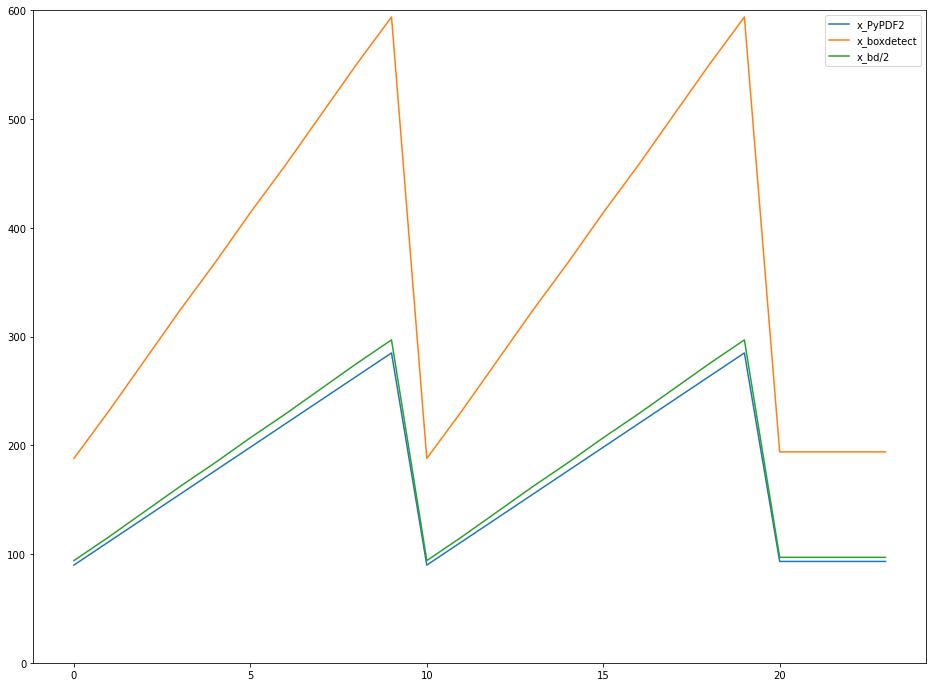

In [290]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
dfx = pd.DataFrame(x_cord)
dfx[0] = dfx[0].astype(float)
dfx[1] = dfx[1].astype(float)
dfx.plot(figsize=(16,12), ax=ax)
ax.legend(["x_PyPDF2", "x_boxdetect", "x_bd/2"])
ax.set_ylim(0,600)

In [288]:
y_cord = np.concatenate((np.array([cord_sol[:,1]]).T, np.array([acord_scan[:,1]]).T, 840-np.array([acord_scan[:,1]]).T/2), axis=1)
y_cord

array([[581.13, 518, 581.0],
       [581.13, 518, 581.0],
       [581.13, 518, 581.0],
       [581.13, 518, 581.0],
       [581.13, 518, 581.0],
       [581.13, 518, 581.0],
       [581.13, 518, 581.0],
       [581.13, 518, 581.0],
       [581.13, 518, 581.0],
       [581.13, 518, 581.0],
       [564.885, 552, 564.0],
       [564.885, 552, 564.0],
       [564.885, 552, 564.0],
       [564.885, 552, 564.0],
       [564.885, 552, 564.0],
       [564.885, 552, 564.0],
       [564.885, 552, 564.0],
       [564.885, 552, 564.0],
       [564.885, 552, 564.0],
       [564.885, 552, 564.0],
       [498.248, 690, 495.0],
       [482.308, 724, 478.0],
       [466.368, 756, 462.0],
       [450.428, 789, 445.5]], dtype=object)

(0.0, 800.0)

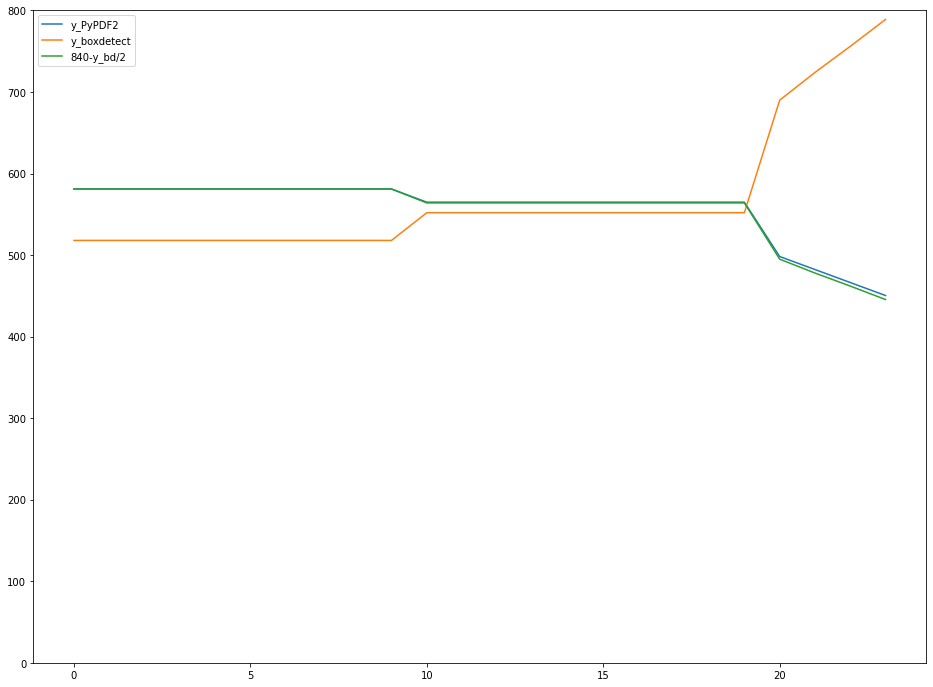

In [293]:
x_cord
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
dfy = pd.DataFrame(y_cord)
dfy[0] = dfy[0].astype(float)
dfy[1] = dfy[1].astype(float)
dfy.plot(figsize=(16,12), ax=ax)
ax.legend(["y_PyPDF2", "y_boxdetect", "840-y_bd/2"])
ax.set_ylim(0,800)

In [210]:
cx = (np.array([cord_sol[:,0]]).T, np.array([acord_scan[:,0]]).T)
cx

(array([[89.867],
        [111.549],
        [133.232],
        [154.914],
        [176.597],
        [198.28],
        [219.962],
        [241.645],
        [263.327],
        [285.01],
        [89.867],
        [111.549],
        [133.232],
        [154.914],
        [176.597],
        [198.28],
        [219.962],
        [241.645],
        [263.327],
        [285.01],
        [93.245],
        [93.245],
        [93.245],
        [93.245]], dtype=object),
 array([[188],
        [232],
        [278],
        [324],
        [368],
        [414],
        [458],
        [504],
        [550],
        [594],
        [188],
        [232],
        [278],
        [324],
        [368],
        [414],
        [458],
        [504],
        [550],
        [594],
        [194],
        [194],
        [194],
        [194]]))

In [257]:
aux = []
for i in range(1,24):
    m1 = (cx[1][i] - cx[1][i-1])
    m2 = (cx[0][i] - cx[0][i-1])
    if m2 == 0:
        m = 2
    else:
        m = m1/m2
    n = cx[1][i] - m * cx[0][i]
    aux.append([m,n[0]])
aux

[[array([Decimal('2.029333087353565169264827968')], dtype=object),
  Decimal('5.6299234387971589336777050')],
 [array([Decimal('2.121477655306000092238158926')], dtype=object),
  Decimal('-4.6487109717290042890743900')],
 [array([Decimal('2.121575500415090858776865603')], dtype=object),
  Decimal('-4.6617470713033852965593580')],
 [array([Decimal('2.029239496379652262140847669')], dtype=object),
  Decimal('9.6423926578425494627127242')],
 [array([Decimal('2.121477655306000092238158926')], dtype=object),
  Decimal('-6.6465894940736982889821518')],
 [array([Decimal('2.029333087353565169264827968')], dtype=object),
  Decimal('11.6238354395350982381699105')],
 [array([Decimal('2.121477655306000092238158926')], dtype=object),
  Decimal('-8.6444680164183922888899137')],
 [array([Decimal('2.121575500415090858776865603')], dtype=object),
  Decimal('-8.6681117978046305691356886')],
 [array([Decimal('2.029239496379652262140847669')], dtype=object),
  Decimal('15.6464511368353087672370059')],
 [a

In [258]:
cy = (np.array([cord_sol[:,1]]).T, np.array([acord_scan[:,1]]).T)
cy

(array([[581.13],
        [581.13],
        [581.13],
        [581.13],
        [581.13],
        [581.13],
        [581.13],
        [581.13],
        [581.13],
        [581.13],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [498.248],
        [482.308],
        [466.368],
        [450.428]], dtype=object),
 array([[518],
        [518],
        [518],
        [518],
        [518],
        [518],
        [518],
        [518],
        [518],
        [518],
        [552],
        [552],
        [552],
        [552],
        [552],
        [552],
        [552],
        [552],
        [552],
        [552],
        [690],
        [724],
        [756],
        [789]]))

In [260]:
auy = []
for i in range(1,24):
    m1 = (cy[1][i] - cy[1][i-1])
    m2 = (cy[0][i] - cy[0][i-1])
    if m2 == 0:
        m = -2
    else:
        m = m1/m2
    n = cy[1][i] - m * cy[0][i]
    auy.append([m,n[0]])
auy

[[-2, Decimal('1680.26')],
 [-2, Decimal('1680.26')],
 [-2, Decimal('1680.26')],
 [-2, Decimal('1680.26')],
 [-2, Decimal('1680.26')],
 [-2, Decimal('1680.26')],
 [-2, Decimal('1680.26')],
 [-2, Decimal('1680.26')],
 [-2, Decimal('1680.26')],
 [array([Decimal('-2.092951677439212065250846414')], dtype=object),
  Decimal('1734.277008310249307479224377')],
 [-2, Decimal('1681.770')],
 [-2, Decimal('1681.770')],
 [-2, Decimal('1681.770')],
 [-2, Decimal('1681.770')],
 [-2, Decimal('1681.770')],
 [-2, Decimal('1681.770')],
 [-2, Decimal('1681.770')],
 [-2, Decimal('1681.770')],
 [-2, Decimal('1681.770')],
 [array([Decimal('-2.070921560094241937662259706')], dtype=object),
  Decimal('1721.832525473835856956345574')],
 [array([Decimal('-2.132998745294855708908406524')], dtype=object),
  Decimal('1752.762358845671267252195734')],
 [array([Decimal('-2.007528230865746549560853199')], dtype=object),
  Decimal('1692.246925972396486825595985')],
 [array([Decimal('-2.070263488080301129234629862')], 